# Examen Encert
## Análisi inicial del fichero
Inicialmente tendrá que leer este fichero y analizar su contenido. En este va encontrar el histórico de datos del EURUSD en candles. Por consiguiente se pregunta:
1. ¿Qué columnas de datos forman el fichero?

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

# We introduce filename as a variable for future works
filename = 'ohlcEURUSD_2005-2019.csv'

In [ ]:
# Cargar los datos
df = pd.read_csv(filename)

# Listar las columnas
columnas = list(df.columns)
print(columnas)

['Date', 'EURUSD_open', 'EURUSD_high', 'EURUSD_low', 'EURUSD_close']


2. ¿Qué rango temporal cubre este histórico de datos?

In [ ]:
minDate = df['Date'].min()
maxDate = df['Date'].max()
print(f"Rango temporal: {minDate} a {maxDate}")

Rango temporal: 2005-01-02 22:00:00 a 2010-11-16 01:00:00


3. Por cada fila tenemos cuatro variables que definen la información del candle. ¿Qué significa cada una de las variables?

Las cuatro variables representan lo siguiente:
*   EURUSD_open: El precio de apertura del par de divisas EUR/USD.
*   EURUSD_high: El precio más alto alcanzado durante el periodo del candle.
*   EURUSD_low: El precio más bajo alcanzado durante el periodo del candle.
*   EURUSD_close: El precio de cierre del par de divisas EUR/USD.






4. Existen intervalos temporales en este fichero donde no se dispone de la información del EURUSD. ¿Puede localizar algunos? ¿Por qué cree que no se ha podido disponer de dicha información?

In [ ]:
Dates = pd.date_range(start=minDate, end=maxDate, freq='H')

df_date = pd.DataFrame({'Date': Dates})

NotFoundInformationDate = df_date[~df_date['Date'].isin(df['Date'])]

print(NotFoundInformationDate)


                     Date
120   2005-01-07 22:00:00
121   2005-01-07 23:00:00
122   2005-01-08 00:00:00
123   2005-01-08 01:00:00
124   2005-01-08 02:00:00
...                   ...
51403 2010-11-14 17:00:00
51404 2010-11-14 18:00:00
51405 2010-11-14 19:00:00
51406 2010-11-14 20:00:00
51407 2010-11-14 21:00:00

[15926 rows x 1 columns]


<ipython-input-6-cb1d6d4b797c>:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  Dates = pd.date_range(start=minDate, end=maxDate, freq='H')
<ipython-input-6-cb1d6d4b797c>:5: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  NotFoundInformationDate = df_date[~df_date['Date'].isin(df['Date'])]


## Extracción estadísticas
A continuación definiremos 3 nuevas variables que las llamaremos open2high, open2low y open2close, las cuales corresponden a la diferencia en **pips** del valor del high, low y close respecto al open para cada candle. Por consiguiente se pide:
1. Dibujar los hitogramas de las variables open2high, open2low y open2close para todo el histórico, los 1000 primeros candles y el año 2018.

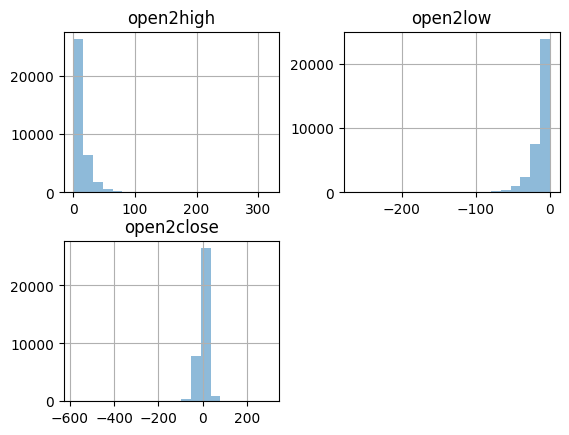

In [ ]:
df['open2high'] = (df['EURUSD_high'] - df['EURUSD_open']) * 10000
df['open2low'] = (df['EURUSD_low'] - df['EURUSD_open']) * 10000
df['open2close'] = (df['EURUSD_close'] - df['EURUSD_open']) * 10000

df.hist(column=['open2high', 'open2low', 'open2close'], bins=20, alpha=0.5)
plt.title('Histogramas de open2high, open2low y open2close')
plt.show()



2. Estimar la esperanza, la desviación típica, la mediana y la moda de la variable open2high para todo el histórico. Realizar y presentar los cáclulos en pips y sin decimales (ejemplo: esperanza = 5 pips, ...)

In [ ]:
#Hago referencia a un articulo que me ayudo en este paso : https://bookdown.org/aquintela/EBE/esperanza-matematica-de-una-variable-aleatoria.html

mean_open2high = int(round(df['open2high'].mean()))
std_open2high = int(round(df['open2high'].std()))
median_open2high = int(round(df['open2high'].median()))
mode_open2high = int(df['open2high'].mode()[0])

print('Mean of open2high:', mean_open2high)
print('Standard deviation of open2high:', std_open2high)
print('Median of open2high:', median_open2high)
print('Mode of open2high:', mode_open2high)




Mean of open2high: 13
Standard deviation of open2high: 14
Median of open2high: 9
Mode of open2high: 0



4. ¿Qué estimadores (escribir fórmula) ha utilizado para calcular la esperanza y la desviación típica?¿Considera que son estimadores de máxima verosimilitud considerando la distribución estadística de la variable open2high?

*   Esperanza -> $\mu = \frac{1}{n} \sum_{i=1}^{n} x_i$

*   Desviación típica -> $\sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2$

Estos son estimadores de máxima verosimilitud, asumiendo que los datos siguen una distribución normal.










## Interpretación de la información para Trading
A continuación realizaremos un conjunto de preguntas relacionadas con la información que proporcionan los candles y las variables definidas anteriormente. Considerando las variables open2high, open2low y open2close:
1. ¿Cómo calcularía la tendencia del EURUSD durante un candle?

Respuesta: Se puede calcular la tendencia observando la variación entre el precio de apertura y el precio de cierre. Si el precio de cierre es mayor que el de apertura, la tendencia es alcista y viceversa.

2. ¿Cómo calcularía el movimiento máximo del EURUSD que se ha producido durante un candle?

Respuesta: El movimiento máximo se puede determinar como la diferencia entre el precio más alto y el precio más bajo del candle.

3. Qué variables son útiles para determinar la volatilidad de un candle.

Respuesta: La volatilidad puede medirse utilizando el rango del candle y la desviación estándar de los precios.

4. Considere que tuviera una estimación correcta de las variables open2high, open2low y open2close del candle 12:00 a 13:00 al inicio de dicho candle. ¿Cómo podría utilizar esta información para realizar una operación de inversión?

Respuesta: Si se tiene una estimación precisa de las variables open2high, open2low y open2close, se pueden establecer órdenes de compra o venta basadas en patrones anticipados.
